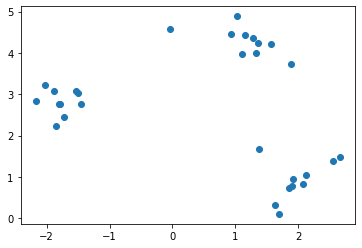

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
#permite la generación de (clusters) de datos con distribución gausiana.
from sklearn.datasets import make_blobs
# Simulación de datos
X, y = make_blobs(
        n_samples    = 30, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 0.40, 
        shuffle      = True, 
        random_state = 0
       )

# Gráficas
plt.scatter(x = X[:, 0],y = X[:, 1])

[[ 0.92136118 -1.23030618]
 [-1.34766429  0.10093602]
 [ 0.42630311  1.12937016]]


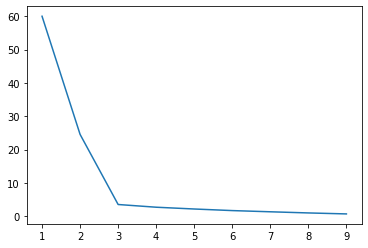

In [ ]:
# Escalado de datos
X_norm = scale(X)
# Método para encontrar el valor optimo de K suma de cuadrados dentro de cada grupo
wcss = []
for i in range (1,10):
  kmeans = KMeans (n_clusters = i, max_iter=15) 
  kmeans.fit (X_norm) 
  wcss.append (kmeans.inertia_)

plt.plot(range(1,10),wcss)

In [ ]:
#modelo
modelo_kmeans = KMeans(n_clusters=4).fit(X_norm)
y_predict = modelo_kmeans.predict(X_norm)
clusters = np.unique(y_predict)
clusters
for i in clusters:
    plt.scatter(
        x = X_norm[y_predict == i, 0],
        y = X_norm[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    )
plt.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '+',
)
